In [1]:
#import sys
#!{sys.executable} -m pip install --upgrade c-lasso 
from classo import *
import zarr
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

## Data 

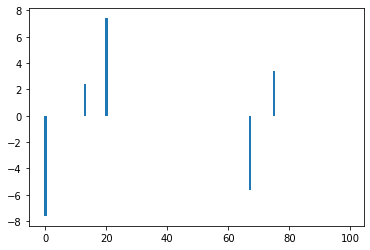

array([ 0, 13, 20, 67, 75])

In [2]:
m,d,d_nonzero,k,sigma =150,100,5,1,0.5
(X,C,y),sol = random_data(m,d,d_nonzero,k,sigma,zerosum=True,seed=0)
plt.bar(range(len(sol)),sol)
plt.show()

np.arange(len(sol))[sol !=0.]

In [3]:
print("lambdamax = ", max(abs(X.T.dot(y))))

lambdamax =  1204.7639353298598


## Problems

In [4]:
problem = classo_problem(X,y+0.5,C=C)
problem.model_selection.PATH = True
problem.model_selection.CV = False
problem.model_selection.StabSel = False
problem.model_selection.LAMfixed = False


problem1 = deepcopy(problem)
problem2 = deepcopy(problem)
problem3 = deepcopy(problem)

problem2.formulation.w = np.array([1.1]*40+ [1.]*(d-40))


problem1.formulation.intercept = True
problem2.formulation.intercept = True
problem3.formulation.intercept = False

### Path 

In [5]:
param = problem1.model_selection.PATHparameters
param.numerical_method = ' '
param.n_active = 20
param.lambdas = np.linspace(1.,1e-3,50)

In [6]:
param = problem2.model_selection.PATHparameters
param.numerical_method = 'P-PDS'
param.n_active = 0
param.lambdas = np.linspace(1.,1e-1,50)

In [7]:
param = problem3.model_selection.PATHparameters
param.numerical_method = 'DR'
param.n_active = 0
param.lambdas = np.linspace(1.,1e-1,20)

### Cross validation 

In [8]:
param = problem1.model_selection.CVparameters
param.seed = None
param.numerical_method = ' '
param.Nsubset = 5
param.oneSE = True
param.lambdas = np.linspace(1.,1e-3,80)

In [9]:
param = problem2.model_selection.CVparameters
param.seed = None
param.numerical_method = ' '
param.Nsubset = 7
param.oneSE = False
param.lambdas = np.linspace(1.,1e-3,80)

In [10]:
param = problem3.model_selection.CVparameters
param.seed = 2
param.numerical_method = 'P-PDS'
param.Nsubset = 3
param.oneSE = True
param.lambdas = np.linspace(1.,1e-1,20)

### Stability Selection

In [11]:
param = problem1.model_selection.StabSelparameters
param.seed = None
param.numerical_method = ' '
param.method = 'first'
param.B = 50
param.q = 10
param.percent_nS = 0.5
param.lamin = 0.01
param.hd = False
param.lam = 'theoretical'
param.true_lam = True
param.threshold = 0.7 
param.threshold_label = 0.2

In [12]:
param = problem2.model_selection.StabSelparameters
param.seed = None
param.numerical_method = ' '
param.method = 'max'
param.B = 70
param.q = 20
param.percent_nS = 0.8
param.lamin = 0.01
param.hd = False
param.lam = 'theoretical'
param.true_lam = True
param.threshold = 0.5 
param.threshold_label = 0.2

In [13]:
param = problem3.model_selection.StabSelparameters
param.seed = None
param.numerical_method = ' '
param.method = 'lam'
param.B = 50
param.q = 1000
param.percent_nS = 0.4
param.lamin = 1.
param.hd = False
param.lam = 'theoretical'
param.true_lam = True
param.threshold = 0.8
param.threshold_label = 0.2

### Lambda fixed 

In [14]:
param = problem1.model_selection.LAMfixedparameters
param.numerical_method = 'P-PDS'
param.lam = 'theoretical'
param.true_lam = True

In [15]:
param = problem2.model_selection.LAMfixedparameters
param.numerical_method = 'DR'
param.lam = 0.1
param.true_lam = False

In [16]:
param = problem3.model_selection.LAMfixedparameters
param.numerical_method = ' '
param.lam = 0.
param.true_lam = True

## R1

In [17]:
problem1.formulation.concomitant = False
problem1.formulation.huber = False
problem1.formulation.classification = False

problem2.formulation.concomitant = False
problem2.formulation.huber = False
problem2.formulation.classification = False

problem3.formulation.concomitant = False
problem3.formulation.huber = False
problem3.formulation.classification = False

 
 
FORMULATION: R1
 
MODEL SELECTION COMPUTED:  
     Path
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     lamin = 0.001
     Nlam = 50
 
     maximum active variables = 20



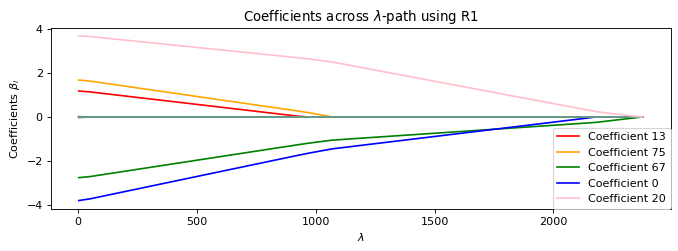


 PATH COMPUTATION : 
 There is also an intercept.  
   Running time :  0.035s

 
 
FORMULATION: R1
 
MODEL SELECTION COMPUTED:  
     Path
 
PATH PARAMETERS: 
     numerical_method : P-PDS
     lamin = 0.1
     Nlam = 50
 



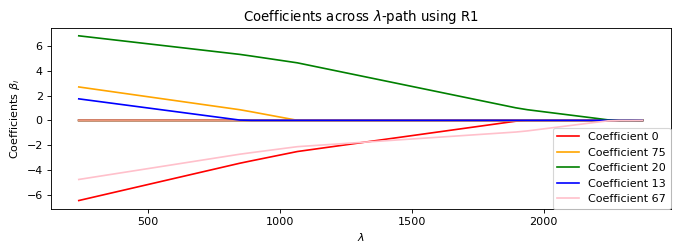


 PATH COMPUTATION : 
 There is also an intercept.  
   Running time :  0.224s

 
 
FORMULATION: R1
 
MODEL SELECTION COMPUTED:  
     Path
 
PATH PARAMETERS: 
     numerical_method : DR
     lamin = 0.1
     Nlam = 20
 



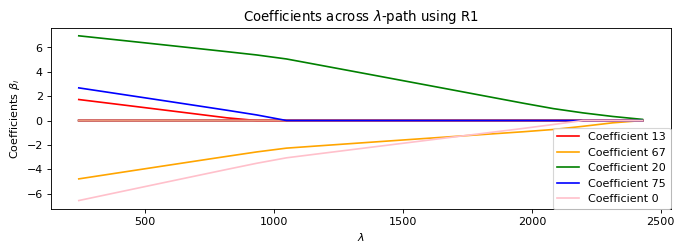


 PATH COMPUTATION : 
   Running time :  0.629s



In [18]:
problem1.solve()
print(problem1)
print(problem1.solution)

problem2.solve()
print(problem2)
print(problem2.solution)


problem3.solve()
print(problem3)
print(problem3.solution)


## Reset the numerical methods 

In [19]:
problem1.model_selection.PATHparameters.numerical_method = ' '
problem2.model_selection.PATHparameters.numerical_method = 'P-PDS'
problem3.model_selection.PATHparameters.numerical_method = 'DR'

problem1.model_selection.CVparameters.numerical_method = ' '
problem2.model_selection.CVparameters.numerical_method = ' '
problem3.model_selection.CVparameters.numerical_method = 'P-PDS' 

problem1.model_selection.StabSelparameters.numerical_method = ' '
problem2.model_selection.StabSelparameters.numerical_method = ' '
problem3.model_selection.StabSelparameters.numerical_method = ' '

problem3.model_selection.StabSelparameters.lam = 'theoretical'

problem1.model_selection.LAMfixedparameters.numerical_method = 'P-PDS'
problem2.model_selection.LAMfixedparameters.numerical_method = 'DR'
problem3.model_selection.LAMfixedparameters.numerical_method = 'Path-Alg'

problem1.model_selection.LAMfixedparameters.lam = 'theoretical'

## R2

In [20]:
problem1.formulation.concomitant = False
problem1.formulation.huber = True
problem1.formulation.classification = False

problem2.formulation.concomitant = False
problem2.formulation.huber = True
problem2.formulation.classification = False

problem3.formulation.concomitant = False
problem3.formulation.huber = True
problem3.formulation.classification = False

too many labels, there for the labels ['0'] have been deleted
 
 
FORMULATION: R2
 
MODEL SELECTION COMPUTED:  
     Path
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     lamin = 0.001
     Nlam = 50
 
     maximum active variables = 20



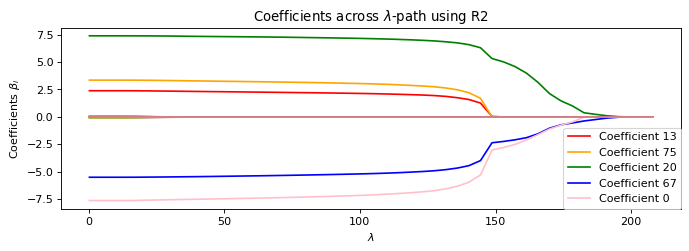


 PATH COMPUTATION : 
 There is also an intercept.  
   Running time :  0.524s

too many labels, there for the labels ['0'] have been deleted
 
 
FORMULATION: R2
 
MODEL SELECTION COMPUTED:  
     Path
 
PATH PARAMETERS: 
     numerical_method : P-PDS
     lamin = 0.1
     Nlam = 50
 



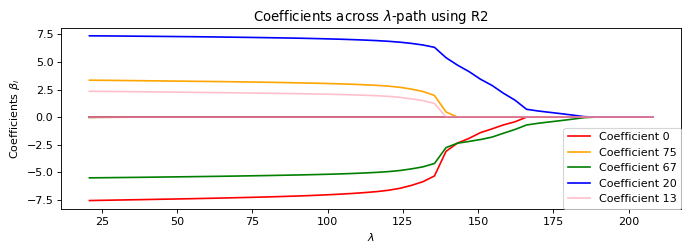


 PATH COMPUTATION : 
 There is also an intercept.  
   Running time :  3.353s

 
 
FORMULATION: R2
 
MODEL SELECTION COMPUTED:  
     Path
 
PATH PARAMETERS: 
     numerical_method : DR
     lamin = 0.1
     Nlam = 20
 



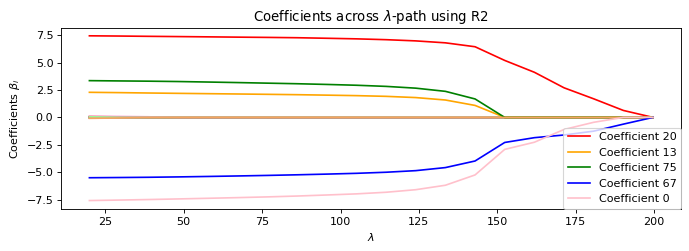


 PATH COMPUTATION : 
   Running time :  9.004s



In [21]:
problem1.solve()
print(problem1)
print(problem1.solution)
# plt.plot(problem1.solution.PATH.LAMBDAS,problem1.solution.PATH.BETAS[:,0])
# plt.show()

problem2.solve()
print(problem2)
print(problem2.solution)


problem3.solve()
print(problem3)
# problem3.solution.CV.graphic(se_max = None)
print(problem3.solution)



## Reset the numerical methods 

In [22]:
problem1.model_selection.PATHparameters.numerical_method = ' '
problem2.model_selection.PATHparameters.numerical_method = 'P-PDS'
problem3.model_selection.PATHparameters.numerical_method = 'DR'

problem1.model_selection.CVparameters.numerical_method = ' '
problem2.model_selection.CVparameters.numerical_method = ' '
problem3.model_selection.CVparameters.numerical_method = 'P-PDS' 

problem1.model_selection.StabSelparameters.numerical_method = ' '
problem2.model_selection.StabSelparameters.numerical_method = ' '
problem3.model_selection.StabSelparameters.numerical_method = ' '

problem3.model_selection.StabSelparameters.lam = 'theoretical'

problem1.model_selection.LAMfixedparameters.numerical_method = 'P-PDS'
problem2.model_selection.LAMfixedparameters.numerical_method = 'DR'
problem3.model_selection.LAMfixedparameters.numerical_method = 'Path-Alg'

problem1.model_selection.LAMfixedparameters.lam = 'theoretical'


problem1.formulation.e = ' '
problem2.formulation.e = ' '
problem3.formulation.e = ' '

## R3

In [23]:
problem1.formulation.concomitant = True
problem1.formulation.huber = False
problem1.formulation.classification = False

problem2.formulation.concomitant = True
problem2.formulation.huber = False
problem2.formulation.classification = False

problem3.formulation.concomitant = True
problem3.formulation.huber = False
problem3.formulation.classification = False

too many labels, there for the labels ['0'] have been deleted
 
 
FORMULATION: R3
 
MODEL SELECTION COMPUTED:  
     Path
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     lamin = 0.001
     Nlam = 50
 
     maximum active variables = 20



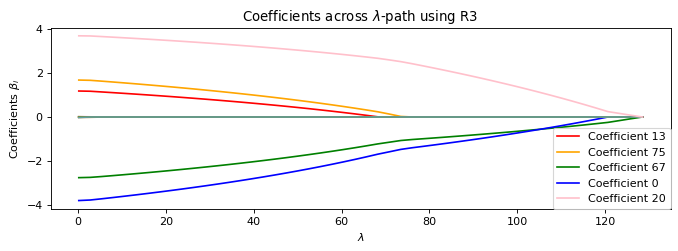

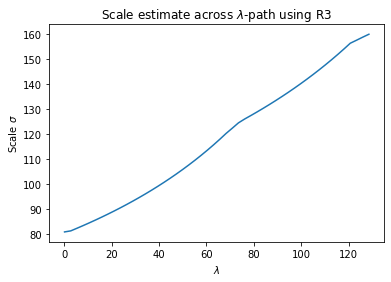


 PATH COMPUTATION : 
 There is also an intercept.  
   Running time :  0.045s

too many labels, there for the labels ['0'] have been deleted
 
 
FORMULATION: R3
 
MODEL SELECTION COMPUTED:  
     Path
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     lamin = 0.1
     Nlam = 50
 



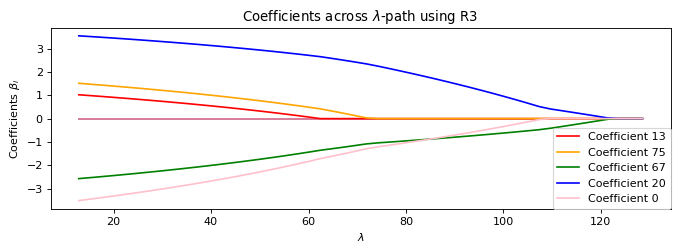

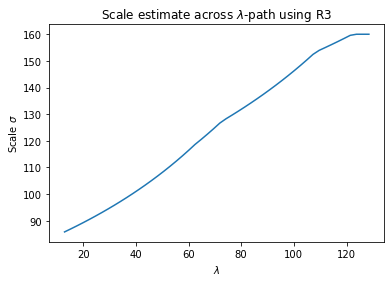


 PATH COMPUTATION : 
 There is also an intercept.  
   Running time :  0.013s

 
 
FORMULATION: R3
 
MODEL SELECTION COMPUTED:  
     Path
 
PATH PARAMETERS: 
     numerical_method : DR
     lamin = 0.1
     Nlam = 20
 



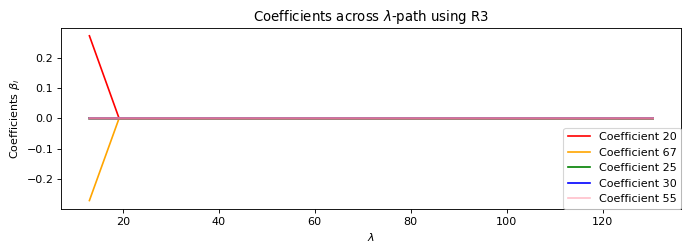

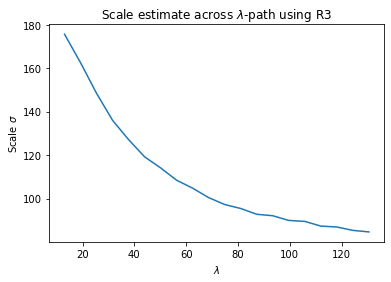


 PATH COMPUTATION : 
   Running time :  216.121s



In [24]:
problem1.solve()
print(problem1)
print(problem1.solution)


problem2.solve()
print(problem2)
print(problem2.solution)


problem3.solve()
print(problem3)
print(problem3.solution)


## Reset the numerical methods 

In [25]:
problem1.model_selection.PATHparameters.numerical_method = ' '
problem2.model_selection.PATHparameters.numerical_method = 'P-PDS'
problem3.model_selection.PATHparameters.numerical_method = 'DR'

problem1.model_selection.CVparameters.numerical_method = ' '
problem2.model_selection.CVparameters.numerical_method = ' '
problem3.model_selection.CVparameters.numerical_method = 'P-PDS' 

problem1.model_selection.StabSelparameters.numerical_method = ' '
problem2.model_selection.StabSelparameters.numerical_method = ' '
problem3.model_selection.StabSelparameters.numerical_method = ' '

problem3.model_selection.StabSelparameters.lam = 'theoretical'

problem1.model_selection.LAMfixedparameters.numerical_method = 'P-PDS'
problem2.model_selection.LAMfixedparameters.numerical_method = 'DR'
problem3.model_selection.LAMfixedparameters.numerical_method = 'Path-Alg'

problem1.model_selection.LAMfixedparameters.lam = 'theoretical'

problem1.formulation.e = ' '
problem2.formulation.e = ' '
problem3.formulation.e = ' '

## R4

In [26]:
problem1.formulation.concomitant = True
problem1.formulation.huber = True
problem1.formulation.classification = False

problem2.formulation.concomitant = True
problem2.formulation.huber = True
problem2.formulation.classification = False

problem3.formulation.concomitant = True
problem3.formulation.huber = True
problem3.formulation.classification = False

too many labels, there for the labels ['0'] have been deleted
 
 
FORMULATION: R4
 
MODEL SELECTION COMPUTED:  
     Path
 
PATH PARAMETERS: 
     numerical_method : DR
     lamin = 0.001
     Nlam = 50
 
     maximum active variables = 20



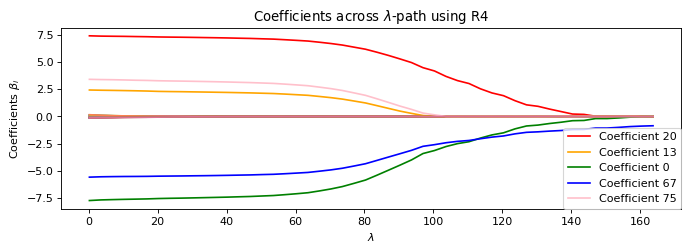

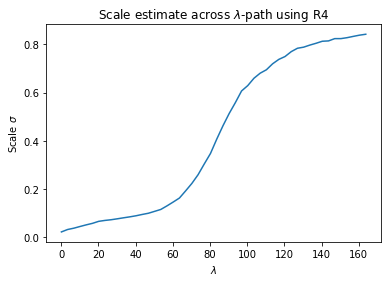


 PATH COMPUTATION : 
 There is also an intercept.  
   Running time :  40.2s

too many labels, there for the labels ['0'] have been deleted
 
 
FORMULATION: R4
 
MODEL SELECTION COMPUTED:  
     Path
 
PATH PARAMETERS: 
     numerical_method : DR
     lamin = 0.1
     Nlam = 50
 



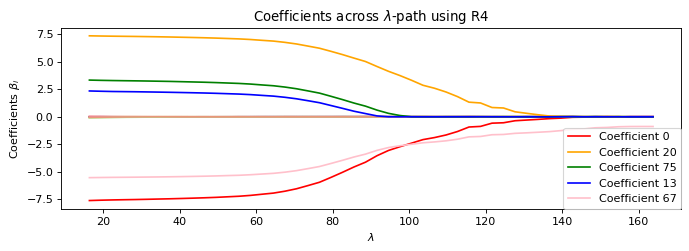

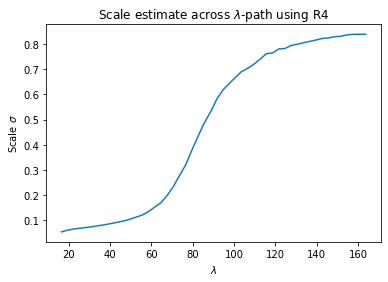


 PATH COMPUTATION : 
 There is also an intercept.  
   Running time :  38.809s

 
 
FORMULATION: R4
 
MODEL SELECTION COMPUTED:  
     Path
 
PATH PARAMETERS: 
     numerical_method : DR
     lamin = 0.1
     Nlam = 20
 



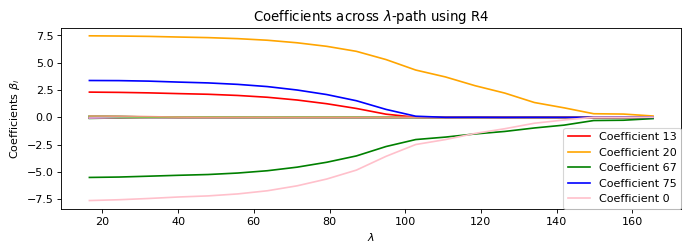

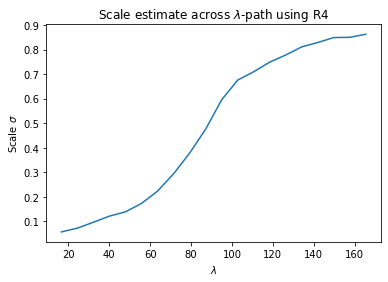


 PATH COMPUTATION : 
   Running time :  32.052s



In [27]:
problem1.solve()
print(problem1)
print(problem1.solution)


problem2.solve()
print(problem2)
print(problem2.solution)


problem3.solve()
print(problem3)
print(problem3.solution)


## Reset the numerical methods 

In [28]:
problem1.model_selection.PATHparameters.numerical_method = ' '
problem2.model_selection.PATHparameters.numerical_method = 'P-PDS'
problem3.model_selection.PATHparameters.numerical_method = 'DR'

problem1.model_selection.CVparameters.numerical_method = ' '
problem2.model_selection.CVparameters.numerical_method = ' '
problem3.model_selection.CVparameters.numerical_method = 'P-PDS' 

problem1.model_selection.StabSelparameters.numerical_method = ' '
problem2.model_selection.StabSelparameters.numerical_method = ' '
problem3.model_selection.StabSelparameters.numerical_method = ' '

problem3.model_selection.StabSelparameters.lam = 'theoretical'

problem1.model_selection.LAMfixedparameters.numerical_method = 'P-PDS'
problem2.model_selection.LAMfixedparameters.numerical_method = 'DR'
problem3.model_selection.LAMfixedparameters.numerical_method = 'Path-Alg'

problem1.model_selection.LAMfixedparameters.lam = 'theoretical'

## C1

In [29]:
problem1.formulation.concomitant = False
problem1.formulation.huber = False
problem1.formulation.classification = True
problem1.data.y = np.sign(problem1.data.y)

problem2.formulation.concomitant = False
problem2.formulation.huber = False
problem2.formulation.classification = True
problem2.data.y = np.sign(problem2.data.y)

problem3.formulation.concomitant = False
problem3.formulation.huber = False
problem3.formulation.classification = True
problem3.data.y = np.sign(problem3.data.y)

too many labels, there for the labels ['0'] have been deleted
 
 
FORMULATION: C1
 
MODEL SELECTION COMPUTED:  
     Path
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     lamin = 0.001
     Nlam = 50
 
     maximum active variables = 20



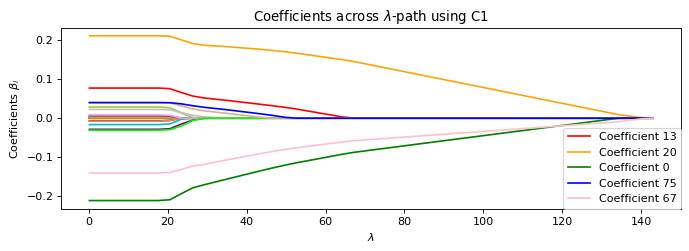


 PATH COMPUTATION : 
 There is also an intercept.  
   Running time :  0.06s

too many labels, there for the labels ['0'] have been deleted
 
 
FORMULATION: C1
 
MODEL SELECTION COMPUTED:  
     Path
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     lamin = 0.1
     Nlam = 50
 



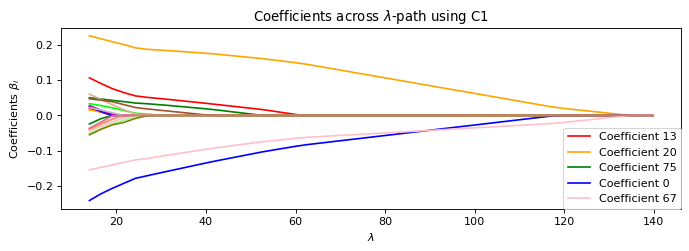


 PATH COMPUTATION : 
 There is also an intercept.  
   Running time :  0.133s

 
 
FORMULATION: C1
 
MODEL SELECTION COMPUTED:  
     Path
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     lamin = 0.1
     Nlam = 20
 



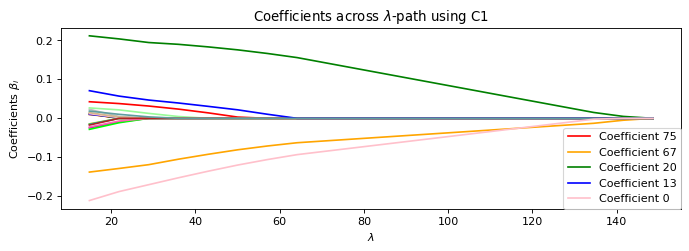


 PATH COMPUTATION : 
   Running time :  0.05s



In [30]:
problem1.solve()
print(problem1)
#problem1.solution.CV.graphic(se_max = None)
print(problem1.solution)


problem2.solve()
print(problem2)
#problem2.solution.CV.graphic(se_max = None)
print(problem2.solution)


problem3.solve()
print(problem3)
#problem3.solution.CV.graphic(se_max = None)
print(problem3.solution)


## Reset the numerical methods 

In [31]:
problem1.model_selection.PATHparameters.numerical_method = ' '
problem2.model_selection.PATHparameters.numerical_method = 'P-PDS'
problem3.model_selection.PATHparameters.numerical_method = 'DR'

problem1.model_selection.CVparameters.numerical_method = ' '
problem2.model_selection.CVparameters.numerical_method = ' '
problem3.model_selection.CVparameters.numerical_method = 'P-PDS' 

problem1.model_selection.StabSelparameters.numerical_method = ' '
problem2.model_selection.StabSelparameters.numerical_method = ' '
problem3.model_selection.StabSelparameters.numerical_method = ' '

problem3.model_selection.StabSelparameters.lam = 'theoretical'

problem1.model_selection.LAMfixedparameters.numerical_method = 'P-PDS'
problem2.model_selection.LAMfixedparameters.numerical_method = 'DR'
problem3.model_selection.LAMfixedparameters.numerical_method = 'Path-Alg'

problem1.model_selection.LAMfixedparameters.lam = 'theoretical'

## C2

In [32]:
problem1.formulation.concomitant = False
problem1.formulation.huber = True
problem1.formulation.classification = True

problem2.formulation.concomitant = False
problem2.formulation.huber = True
problem2.formulation.classification = True

problem3.formulation.concomitant = False
problem3.formulation.huber = True
problem3.formulation.classification = True

too many labels, there for the labels ['0'] have been deleted
 
 
FORMULATION: C2
 
MODEL SELECTION COMPUTED:  
     Path
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     lamin = 0.001
     Nlam = 50
 
     maximum active variables = 20



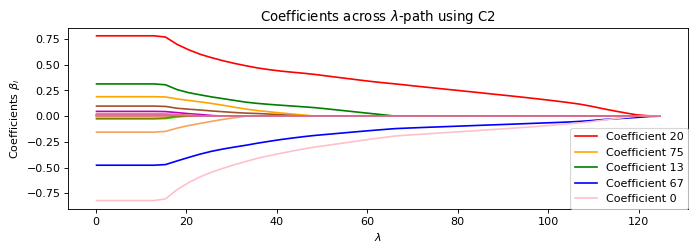


 PATH COMPUTATION : 
 There is also an intercept.  
   Running time :  0.432s

too many labels, there for the labels ['0'] have been deleted
 
 
FORMULATION: C2
 
MODEL SELECTION COMPUTED:  
     Path
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     lamin = 0.1
     Nlam = 50
 



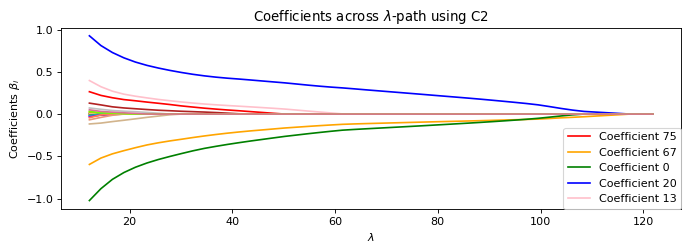


 PATH COMPUTATION : 
 There is also an intercept.  
   Running time :  0.454s

 
 
FORMULATION: C2
 
MODEL SELECTION COMPUTED:  
     Path
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     lamin = 0.1
     Nlam = 20
 



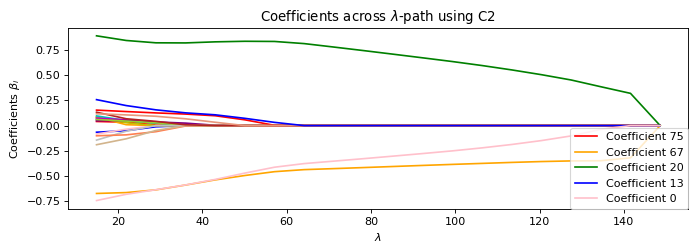


 PATH COMPUTATION : 
   Running time :  0.389s



In [33]:
problem1.solve()
print(problem1)
print(problem1.solution)


problem2.solve()
print(problem2)
print(problem2.solution)


problem3.solve()
print(problem3)
print(problem3.solution)